<h3><u>Exploratory Data Analysis using Data Visualization and Implementation of K-Nearest Neighbors Algorithm from Scratch</u>
<h4>Girija Prakash Shingte <br> 
shingte.girija@gmail.com

<h4><u>Objective:</u></h4>
The objective of this project is to perform exploratory data analysis in order to get to know the data better. Statistical data or data represented in tabular format is not very intuitive. Data visualized graphically on the other hand is more insightful and comprehensible. Thus, for the purpose of exploratory data analysis, different graphs have been used.

In Machine Learning, classification using K-Nearest Neighbors on the Iris dataset is the equivalent of a "Hello World" program we write in any programming language. Although Scikit learn has made our lives simpler, it is best to understand the mechanism of any ML algorithm by implementing it from scratch. Thus, the KNN algorithm is implemented from scratch in the last section.

<h4><u>Reading and setting up data

In [1]:
#import the usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed
from math import sqrt

In [2]:
#Reading the iris.data csv
df = pd.read_csv('iris.data',header=None)

In [3]:
#Headers for the dataframe
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Exploratory Data Analysis using Data Visualization

In [4]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<ul>
<li>From the above result we can see that there are 4 numerical attributes(sepal_length, sepal_width, petal_length, petal_width) and 1 categorical attribute(class)
<li>Every column has 150 entries which indicates that there are no missing values.
<li>We can further check if there are duplicate values and remove duplicate rows.

In [5]:
#Remove duplicates and re-check summary of dataframe
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    147 non-null float64
sepal_width     147 non-null float64
petal_length    147 non-null float64
petal_width     147 non-null float64
class           147 non-null object
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


<ul>
<li>We can see that the count of number of rows has gone down to 147 from 150. This means duplicates were present.

In [6]:
#Further insight on the categorical attribute
print(df['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


<ul>
<li>We can see that there are 3 unique classes: Iris-setosa, Iris-versicolor, and Iris-virginica

In [7]:
#Statistical description of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ul>
<li>From the above table we can see that the standard deviation of sepal_width is the least from its mean value.
<li>Also, the mean value is quite close to the median (given by 50%) for sepal_width.
<li>Thus, we can expect the distribution curve of this attribute to be shaped like a normal curve.
<li>Similar is the case for sepal_length. However, the standard deviation is high so the distribution curve for this attribute will be more spread out.
<li>In case of petal_length, the standard deviation is the highest compared to other attributes. Also, the difference between the mean and median values is high. This indicates skewness in the distribution.
<li>Similar is the case for petal_width. However, the median value is only slightly higher than the mean value but standard deviation is comparatively high.
<li>In the below section, the distribution curves for the attributes have been visualized.

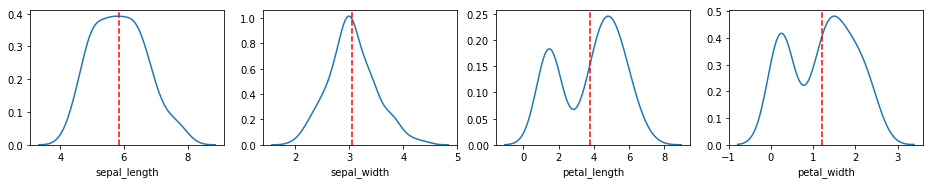

In [8]:
#density plots
cols = list(df.drop('class',axis=1).columns)
plt.figure(figsize=(4*4,150*3))
for i in range(0, len(cols)):
    avg = df[cols[i]].mean()
    plt.subplot(151,4,i+1)
    sns.distplot(df[cols[i]],kde=True, hist=False)
    plt.axvline(x=avg, color='red', linestyle='--')

<ul>
<li>With the help of above density plots, we can easily get an idea about the distribution of attributes.
<li>For sepal_length, mean and median values are very close to each other. However, the distribution is slightly uneven although the curve looks bell shaped.
<li>In the case of sepal_width, the standard deviation is the least as compared to other attributes. Mean and median values are very close. Distribution is shaped like the normal curve.
<li>In case of petal_length and petal_width there distribution is uneven.
<li>In the below section we will check whether there are outliers in the data.

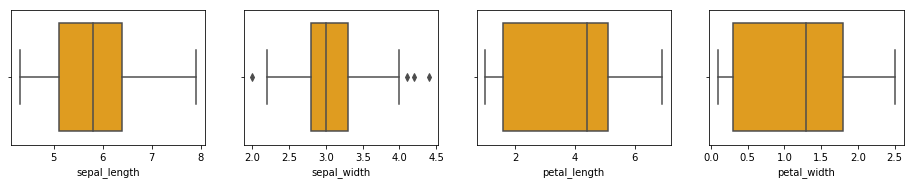

In [9]:
#boxplots
cols = list(df.drop('class',axis=1).columns)
plt.figure(figsize=(4*4,150*3))
for i in range(0, len(cols)):
    avg = df[cols[i]].mean()
    plt.subplot(151,4,i+1)
    sns.boxplot(df[cols[i]], color='orange')

<ul>
<li>From the above box plots we can see there are four outlier values in sepal_width. 
<li>To deal with these outliers, the rows containing these four values are dropped.

In [10]:
#find indices of the rows that have outliers
indices = df[(df.sepal_width<2.2) | (df.sepal_width>4.0)].index
#drop rows with those index values
df = df.drop(indices)

<ul>
<li>We will now check if there are changes to the distribution.

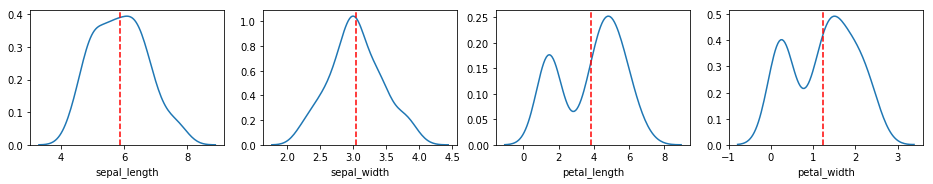

In [11]:
#density plots
cols = list(df.drop('class',axis=1).columns)
plt.figure(figsize=(4*4,150*3))
for i in range(0, len(cols)):
    avg = df[cols[i]].mean()
    plt.subplot(151,4,i+1)
    sns.distplot(df[cols[i]],kde=True, hist=False)
    plt.axvline(x=avg, color='red', linestyle='--')

<ul>
<li>We can see that after dropping the outliers, there is a slight change in the distribution for sepal_length.
<li>In the below chunk of code, the box-plots are plotted again to confirm there are no outliers.

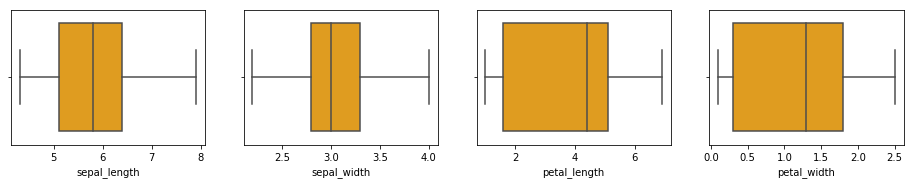

In [12]:
#boxplots
cols = list(df.drop('class',axis=1).columns)
plt.figure(figsize=(4*4,150*3))
for i in range(0, len(cols)):
    avg = df[cols[i]].mean()
    plt.subplot(151,4,i+1)
    sns.boxplot(df[cols[i]], color='orange')

<ul>
<li>We can see that there are no outliers
<li>In the below chunk of code, the correlation between the attributes is found to determine the significance of attributes.

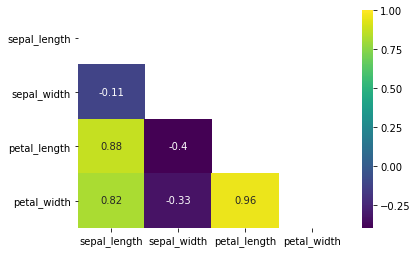

In [13]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(),cmap='viridis',annot=True, mask=mask)

<ul>
<li>sepal_width and sepal_length have a strong negative correlation.
<li>petal_length and sepal_length have a strong positive correlation.
<li>petal_width and sepal_length also have a strong negative correlation
<li>petal_length and sepal_width have a strong negative correlation.
<li>petal_length and sepal_width also have a strong negative correlation.
<li>petal_length anf and petal_width have a strong positive correlation.
<li>Since all the attributes are strongly correlated to eachother, there is no need to remove any attribute.

<h3>Train-test split

<ul>
<li>In this section, the train and test data has been split manually using functionalities available in the pandas library.

In [14]:
#function to split train-test data manually
#argument- dataframe
#returns- X_train, y_train, X_test, y_test dataframes
def train_test_split(df):
    train = df.sample(frac = (2/3), random_state=99)
    test = df.loc[~df.index.isin(train.index)]
    X_train = train.drop('class',axis=1)
    y_train = train['class']
    X_test = test.drop('class',axis=1)
    y_test = test['class']
    return (X_train, y_train, X_test, y_test)

In [15]:
X_train, y_train, X_test, y_test = train_test_split(df)

<h3>KNN Classifier from Scratch

<ul>
<li>In this section, there is a class KNeighborsClassifier which consists of two functions: fit(X_train, y_train) and predict(X_test).
<li>While declaring the class object, the number of neighbors is provided.
<li>The fit function simply reads the X_train and y_train dataframes since KNN algorithm is a lazy learner.
<li>In the predict function, the euclidean distance between a test instance and all other training instances is found.
<li>Based on the 'k' number of neighbors provided, classes of the 'k' closest training instances are found.
<li>The class having majority is the predicted class for the test instance.

In [16]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
    #fit function to read X_train and y_train data
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    #predict function to predict class of test instances
    def predict(self, X_test):
        self.X_test = X_test
        #X_train and X_test is converted to numpy arrays for calculation simplicity 
        xtrain = self.X_train.to_numpy()
        xtest = self.X_test.to_numpy()
        #y_train is converted to a list for calculation simplicity
        ytrain = self.y_train.to_list()
        #an empty list where predicted classes for corresponding test instances will be appended
        classes = []
        #for every instance in x_test 
        for row in xtest:
            #count number of columns in X_train and create a zeros array
            n = len(X_train.columns.to_list())
            arr = np.zeros((n,))
            #empty array to store distances
            distances = []
            #for every instance in X_train
            for item in xtrain:
                #calculate the euclidean distance and append the distances
                #thus when this loop stops running, the length of distances list
                #will be equal to the number of X_train instances
                distances.append(sqrt(np.sum((item-row)**2)))
            #get indices of the X_train instances when they are sorted
            indices_of_sorted_distances = np.argsort(distances)
            #crop the list based on number of neighbors
            neighbors_indices = indices_of_sorted_distances[:self.n_neighbors]
            #find classes of neighbors
            neighbors_class = []
            for i in neighbors_indices:
                neighbors_class.append(ytrain[i])
            #find unique classes
            unique_classes = list(set(neighbors_class))
            #dictionary to find number of occurences of a class
            keys = unique_classes
            vals = []
            for cls in unique_classes:
                cnt=0
                for element in neighbors_class:
                    if(cls==element):
                        cnt+=1
                vals.append(cnt)
            occurences = dict(zip(keys,vals))
            #Find the class that has occured maximum number of times
            #append the class to classes list
            classes.append(max(occurences,key=occurences.get))
        #return a list of classes
        return(classes)          

In [17]:
#y_test is converted to a list as predicted classes are also in a list.
#this will simplify model evaluation.
y_test = y_test.to_list()

<ul>
<li>In the below section, the model is evaluated by calculating the error-rate.
<li>1-40 are the values chosen for number of neighbors
<li>The value showing the least error rate can be considered the correct value for number of neighbors.

In [26]:
#model evaluation
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cnt = 0
    for i in range(len(y_test)):
        if(y_pred[i]==y_test[i]):
            cnt+=1
    error_rate.append(1-(cnt/len(y_test)))

Text(0, 0.5, 'Error_rate')

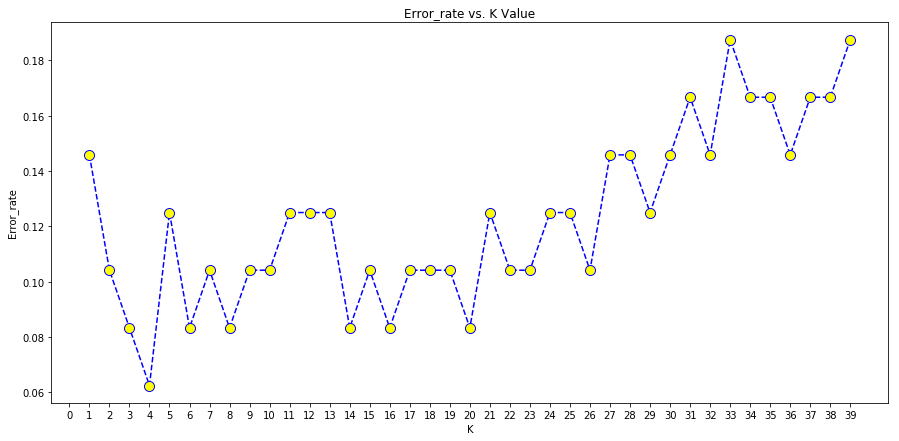

In [28]:
#plot the error rate against the number of neighbors 'k'.
plt.figure(figsize=(15,7))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Error_rate vs. K Value')
plt.xticks(ticks=np.arange(0,40,1))
plt.xlabel('K')
plt.ylabel('Error_rate')

<ul>
<li>From the above plot we can see that the error rate is lowest when the number of neighbors is 4.

<h3>Conclusion:</h3>
Thus, exploratory data analysis using data visualization gave us a clear insight about the data and KNN model implemented from scratch gave us very low error rates between 0.05 to 0.20 for range of k values 1-40. 

<h3>References:</h3>
<ul>
<li>Uci.edu. (2019). UCI Machine Learning Repository: Iris Data Set. [online] Available at: https://archive.ics.uci.edu/ml/datasets/iris.
<li>Han, J. and Kamber, M. (2012). Data mining : concepts and techniques. Haryana, India ; Burlington, Ma: Elsevier.
<li>Portilla, J. and Portilla, J. (2015). Python for Data Science and Machine Learning Bootcamp. [online] Udemy. Available at: https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/ .
<li>Patil, P. (2018). What is Exploratory Data Analysis? [online] Towards Data Science. Available at: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15.